In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import sys
dirwork ='../scripts/'
sys.path.append(dirwork)
import pmixSample

In [2]:
# Pressure, Temperature, phi(stoichiometric ratio)
one_atm = 101325
TempMax = 1000./0.8 #1200; #K
TempMin = 800 #1300; #K

PressureMax = 45*one_atm; # atm
PressureMin = 1*one_atm; # atm

phiMax = 0.5; # 
phiMin = 3; # 
print(TempMax,TempMin)
print(1000/TempMax,1000/TempMin)

1250.0 800
0.8 1.25


In [3]:
Npp = 1
Npt = 10
Npphi = 10
N = Npp*Npt*Npphi
pressure    = [PressureMin]#[PressureMin, PressureMax] # , np.linspace(PressureMin, PressureMax, Npp) #
temperature = np.linspace(TempMin, TempMax, Npt)
eqratio     = np.linspace(phiMin, phiMax, Npphi)
p, temp, phi = np.meshgrid(pressure, temperature,eqratio)
print('p',np.size(p))
p    = p.reshape(np.size(p)) #flatten()
temp = temp.reshape(np.size(temp))#flatten()
phi  = phi.reshape(np.size(phi))#flatten()

p 100


In [4]:
Nvar = 6
sample = np.zeros([N,Nvar])
fuel ="CH4"
nC=1

In [5]:
for i in range(N):
    sample[i,0] = temp[i]
    sample[i,1] = p[i]
    Yp_fuel, Yr_o2, Yr_n2, Yr_ar = pmixSample.getMassFraction(nC,phi[i])
    sample[i,2] = Yp_fuel
    sample[i,3] = Yr_o2
    sample[i,4] = Yr_n2 
    sample[i,5] = Yr_ar

In [6]:
savedir = 'inputs/'
header_fuel = "T P "+fuel+" O2 N2 AR"
np.savetxt(savedir+'/sample.dat',sample,header=header_fuel,comments='')

In [7]:
def plotResults(x, y, z, name_title , x_label_name='1000/T ',y_label_name='mass fraction CO',\
               xtickvalues=None,ytickvalues=None,cticks=None,cticklabels=None,fs_label=22,fs_tick=20):
    N = 5
    lista = np.logspace(-2,-1,N).tolist()
    for i in [-1,0,1]:
        lista += np.logspace(i,i+1,N).tolist()[1:]
    fig, ax2 = plt.subplots(figsize=(10,8), nrows=1)
    ax2.tricontour(x, y, z, levels=lista, linewidths=0.5,  colors='k',norm=colors.LogNorm())
    cntr2 = ax2.tricontourf(x, y, z,  levels=lista, cmap="RdBu_r",norm=colors.LogNorm())
    if cticks is not None:
        cbar = fig.colorbar(cntr2, ax=ax2, ticks=cticks)    
    else:
        cbar = fig.colorbar(cntr2, ax=ax2)
    if cticklabels is not None:
        cbar.ax.set_yticklabels(cticklabels) 
    cbar.ax.tick_params(labelsize=fs_label)
    cbar.ax.set_ylabel(name_title,fontsize=fs_label)
    cbar.ax.tick_params(labelsize=fs_label)
    ax2.set_title(name_title,fontsize=fs_label)
    plt.subplots_adjust(hspace=0.5)
    ax2.set_xlabel(x_label_name,fontsize=fs_label)
    ax2.set_ylabel(y_label_name,fontsize=fs_label) 
    if xtickvalues is not None:
        ax2.set_xticks(xtickvalues)
    if ytickvalues is not None:
        ax2.set_yticks(ytickvalues)
    for tick in ax2.xaxis.get_major_ticks()+ax2.yaxis.get_major_ticks():
        tick.label.set_fontsize(fs_tick)
    return 

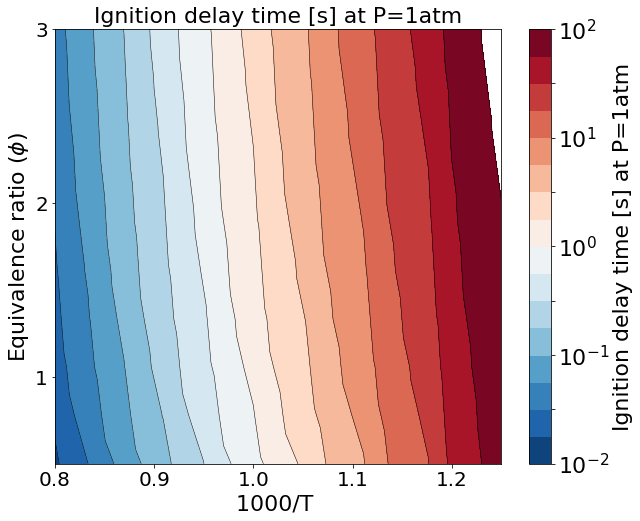

In [8]:
dirOutput = ''
IgnTime = np.loadtxt(dirOutput+'IgnitionDelayTime.dat')
Np = np.where((IgnTime>0))[0]
x = 1000./sample[Np,0]#sample[Np,0];#
Yo2 = sample[Np,3]
phi = pmixSample.getPhifromYo2(1,Yo2)
z = IgnTime[Np]
name_value =  'Ignition delay time [s] at P=1atm'
plotResults(x, phi, z,name_value, y_label_name='Equivalence ratio ($\phi$)',xtickvalues=[0.8,0.9,1,1.1,1.2],ytickvalues=[1,2,3])
plt.savefig('Gri3IgnDelayTime'+'.pdf')